# 时间序列分析

**参考**：   
1. Wes McKinney, Python for Data Analysis, 2017
2. https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ 
3. 王燕，应用时间序列分析
4. https://www.cnblogs.com/bradleon/p/6832867.html
5. https://blog.csdn.net/bea_tree/article/details/51207223
6. https://www.cnblogs.com/Yuanjing-Liu/p/9284326.html
7. https://www.zhihu.com/question/31833683

### Pandas处理时间序列

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### 日期和时间数据类型转换

**DateTime格式定义**：  
%Y Four-digit year  
%y Two-digit year  
%m Two-digit month [01, 12]  
%d Two-digit day [01, 31]   
%H Hour (24-hour clock) [00, 23]   
%I Hour (12-hour clock) [01, 12]     
%M Two-digit minute [00, 59]   
%S Second [00, 61] (seconds 60, 61 account for leap seconds)   
%w Weekday as integer [0 (Sunday), 6]   
%U Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”    
%W Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”    
%z UTC time zone offset as +HHMM or -HHMM; empty if time zone naive    
%F Shortcut for %Y-%m-%d (e.g., 2012-4-18)    
%D Shortcut for %m/%d/%y (e.g., 04/18/12)   

**特定日期格式**   
%a Abbreviated weekday name   
%A Full weekday name   
%b Abbreviated month name    
%B Full month name    
%c Full date and time (e.g., ‘Tue 01 May 2012 04:20:57 PM’)    
%p Locale equivalent of AM or PM   
%x Locale-appropriate formatted date (e.g., in the United States, May 1, 2012 yields ’05/01/2012’) 
%X Locale-appropriate time (e.g., ’04:24:12 PM’)    

In [2]:
# 日期和字符串间的转化
stamp = datetime(2018, 1, 1, 12, 1, 10)
print(type(stamp), stamp)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'), '\n')

datestr = '2019-01-03'
date = datetime.strptime(datestr, '%Y-%m-%d')
print(type(date), date, '\n')

timestr = '12:10:10'
time = datetime.strptime(timestr, '%H:%M:%S')
print(type(time), time, '\n')

datestrs = ['7/16/2018', '12/30/2018']
pd.to_datetime(datestrs)

<class 'datetime.datetime'> 2018-01-01 12:01:10
2018-01-01 12:01:10
2018-01-01 

<class 'datetime.datetime'> 2019-01-03 00:00:00 

<class 'datetime.datetime'> 1900-01-01 12:10:10 



DatetimeIndex(['2018-07-16', '2018-12-30'], dtype='datetime64[ns]', freq=None)

#### 时间序列基础

In [3]:
dates = [datetime(2019, 1, 2), datetime(2018, 1, 5), datetime(2017, 1, 7), 
         datetime(2019, 1, 8), datetime(2018, 1, 10), datetime(2017, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
print(ts)
print(ts.index)
# 选择
print(ts['20180105'], ts['2017-01-7'])
print(ts[ts.index[2]])
# 切片
print(ts[::2])

2019-01-02    2.158757
2018-01-05   -0.579304
2017-01-07    0.830490
2019-01-08    0.217947
2018-01-10    0.530978
2017-01-12   -1.781154
dtype: float64
DatetimeIndex(['2019-01-02', '2018-01-05', '2017-01-07', '2019-01-08',
               '2018-01-10', '2017-01-12'],
              dtype='datetime64[ns]', freq=None)
2018-01-05   -0.579304
dtype: float64 2017-01-07    0.83049
dtype: float64
0.8304902523894675
2019-01-02    2.158757
2017-01-07    0.830490
2018-01-10    0.530978
dtype: float64


#### 日期范围、频率和移动

In [4]:
index1 = pd.date_range('2018-04-01', '2019-01-01')
index2 = pd.date_range(start='2018-04-01', periods=20)
index3 = pd.date_range(start='2019-01-01', periods=20)
index4 = pd.date_range('2012-05-02 12:56:31', periods=5)
print(index1, '\n', index2, '\n', index3, '\n', index4)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=276, freq='D') 
 DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20'],
              dtype='datetime64[ns]', freq='D') 
 DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',


**基本时间序列频率**   
D Day Calendar daily   
B BusinessDay Business daily   
H Hour Hourly   
T or min Minute Minutely   
S Second Secondly   
L or ms Milli Millisecond (1/1,000 of 1 second)   
U Micro Microsecond (1/1,000,000 of 1 second)   
M MonthEnd Last calendar day of month   
BM BusinessMonthEnd Last business day (weekday) of month   
MS MonthBegin First calendar day of month   
BMS BusinessMonthBegin First weekday of month   
W-MON, W-TUE, ... Week Weekly on given day of week (MON, TUE, WED, THU, FRI, SAT, or SUN)   
WOM-1MON, WOM-2MON, ... WeekOfMonth Generate weekly dates in the first, second, third, or fourth week of the month (e.g., WOM-3FRI for the third Friday of each month)   
Q-JAN, Q-FEB, ... QuarterEnd Quarterly dates anchored on last calendar day of each month, for year ending in indicated month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)   
BQ-JAN, BQ-FEB, ... BusinessQuarterEnd Quarterly dates anchored on last weekday day of each month, for year ending in indicated month   
QS-JAN, QS-FEB, ... QuarterBegin Quarterly dates anchored on first calendar day of each month, for year ending in indicated month   
BQS-JAN, BQS-FEB, ... BusinessQuarterBegin Quarterly dates anchored on first weekday day of each month, for year ending in indicated month   
A-JAN, A-FEB, ... YearEnd Annual dates anchored on last calendar day of given month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)   
BA-JAN, BA-FEB, ... BusinessYearEnd Annual dates anchored on last weekday of given month   
AS-JAN, AS-FEB, ... YearBegin Annual dates anchored on first day of given month   
BAS-JAN, BAS-FEB, ... BusinessYearBegin Annual dates anchored on first weekday of given month   

In [5]:
print(pd.date_range('2019-01-01', periods=10, freq='1h30min'))
# WOM-3FRI: 每个月的第三个星期五
print(pd.date_range('2019-01-01', '2019-09-01', freq='WOM-3FRI'))

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:30:00',
               '2019-01-01 03:00:00', '2019-01-01 04:30:00',
               '2019-01-01 06:00:00', '2019-01-01 07:30:00',
               '2019-01-01 09:00:00', '2019-01-01 10:30:00',
               '2019-01-01 12:00:00', '2019-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')
DatetimeIndex(['2019-01-18', '2019-02-15', '2019-03-15', '2019-04-19',
               '2019-05-17', '2019-06-21', '2019-07-19', '2019-08-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


In [6]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2019', periods=4, freq='M'))
print(ts)
# 只对数据进行位移
print(ts.shift(2))
# 对数据和时间同时位移
print(ts.shift(2, freq='M'))
print(ts.shift(3, freq='D'))

2019-01-31   -0.874766
2019-02-28   -1.666911
2019-03-31   -0.642722
2019-04-30   -0.303101
Freq: M, dtype: float64
2019-01-31         NaN
2019-02-28         NaN
2019-03-31   -0.874766
2019-04-30   -1.666911
Freq: M, dtype: float64
2019-03-31   -0.874766
2019-04-30   -1.666911
2019-05-31   -0.642722
2019-06-30   -0.303101
Freq: M, dtype: float64
2019-02-03   -0.874766
2019-03-03   -1.666911
2019-04-03   -0.642722
2019-05-03   -0.303101
dtype: float64


#### 重采样和频率转换

In [7]:
rng = pd.date_range('2018-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)

print(ts.resample('M').mean())

2018-01-01    1.195848
2018-01-02   -0.157086
2018-01-03    0.678381
2018-01-04   -2.832214
2018-01-05   -0.459628
2018-01-06    0.041311
2018-01-07    0.381290
2018-01-08    0.146598
2018-01-09    1.713546
2018-01-10    0.879652
2018-01-11    1.766047
2018-01-12   -2.223751
2018-01-13    1.200312
2018-01-14   -1.347315
2018-01-15   -0.512099
2018-01-16   -0.130977
2018-01-17    1.222048
2018-01-18    0.293515
2018-01-19   -0.441020
2018-01-20    0.742168
2018-01-21   -1.596948
2018-01-22   -0.391068
2018-01-23    0.080183
2018-01-24   -2.018280
2018-01-25   -0.655201
2018-01-26   -0.871782
2018-01-27   -1.069941
2018-01-28   -0.111380
2018-01-29    0.621918
2018-01-30    0.463003
                ...   
2018-03-12    0.197983
2018-03-13    0.243252
2018-03-14    0.123070
2018-03-15    0.561543
2018-03-16    1.372100
2018-03-17   -0.848409
2018-03-18    0.983483
2018-03-19    0.575445
2018-03-20    0.115671
2018-03-21    0.374690
2018-03-22    0.382398
2018-03-23    0.179985
2018-03-24 

freq: String or DateOffset indicating desired resampled frequency (e.g., ‘M', ’5min', or Second(15))    
axis: Axis to resample on; default axis=0    
fill_method: How to interpolate when upsampling, as in 'ffill' or 'bfill'; by default does no interpolation   
closed: In downsampling, which end of each interval is closed (inclusive), 'right' or 'left' label In downsampling, how to label the aggregated result, with the 'right' or 'left' bin edge (e.g., the 9:30 to 9:35 five-minute interval could be labeled 9:30 or 9:35)       
loffset: Time adjustment to the bin labels, such as '-1s' / Second(-1) to shift the aggregate labels one second earlier    
limit: When forward or backward filling, the maximum number of periods to fill    
kind: Aggregate to periods ('period') or timestamps ('timestamp'); defaults to the type of index the time series has   
convention: When resampling periods, the convention ('start' or 'end') for converting the low-frequency period to high frequency; defaults to 'end'   

In [8]:
rng = pd.date_range('2018-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
print(ts)

2018-01-01 00:00:00     0
2018-01-01 00:01:00     1
2018-01-01 00:02:00     2
2018-01-01 00:03:00     3
2018-01-01 00:04:00     4
2018-01-01 00:05:00     5
2018-01-01 00:06:00     6
2018-01-01 00:07:00     7
2018-01-01 00:08:00     8
2018-01-01 00:09:00     9
2018-01-01 00:10:00    10
2018-01-01 00:11:00    11
Freq: T, dtype: int32


In [9]:
# 降采样
print(ts.resample('5min', closed='right').sum())
print(ts.resample('5min', closed='left').sum())
print(ts.resample('5min', closed='right', label='right').sum())
print(ts.resample('5min', closed='right', label='right', loffset='-1s').sum())

2017-12-31 23:55:00     0
2018-01-01 00:00:00    15
2018-01-01 00:05:00    40
2018-01-01 00:10:00    11
Freq: 5T, dtype: int32
2018-01-01 00:00:00    10
2018-01-01 00:05:00    35
2018-01-01 00:10:00    21
Freq: 5T, dtype: int32
2018-01-01 00:00:00     0
2018-01-01 00:05:00    15
2018-01-01 00:10:00    40
2018-01-01 00:15:00    11
Freq: 5T, dtype: int32
2017-12-31 23:59:59     0
2018-01-01 00:04:59    15
2018-01-01 00:09:59    40
2018-01-01 00:14:59    11
Freq: 5T, dtype: int32


In [10]:
# 升采样
frame = pd.DataFrame(np.random.randn(2, 4), index=pd.date_range('1/1/2019', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame)
df_daily = frame.resample('D').asfreq()
print(df_daily)

print(frame.resample('D').bfill())
print(frame.resample('W-THU').ffill())

            Colorado     Texas  New York      Ohio
2019-01-02 -0.146925 -1.116765  0.031773  3.102733
2019-01-09  0.275397 -1.020221 -0.001986 -2.424638
            Colorado     Texas  New York      Ohio
2019-01-02 -0.146925 -1.116765  0.031773  3.102733
2019-01-03       NaN       NaN       NaN       NaN
2019-01-04       NaN       NaN       NaN       NaN
2019-01-05       NaN       NaN       NaN       NaN
2019-01-06       NaN       NaN       NaN       NaN
2019-01-07       NaN       NaN       NaN       NaN
2019-01-08       NaN       NaN       NaN       NaN
2019-01-09  0.275397 -1.020221 -0.001986 -2.424638
            Colorado     Texas  New York      Ohio
2019-01-02 -0.146925 -1.116765  0.031773  3.102733
2019-01-03  0.275397 -1.020221 -0.001986 -2.424638
2019-01-04  0.275397 -1.020221 -0.001986 -2.424638
2019-01-05  0.275397 -1.020221 -0.001986 -2.424638
2019-01-06  0.275397 -1.020221 -0.001986 -2.424638
2019-01-07  0.275397 -1.020221 -0.001986 -2.424638
2019-01-08  0.275397 -1.020221 

#### 滑动窗口函数

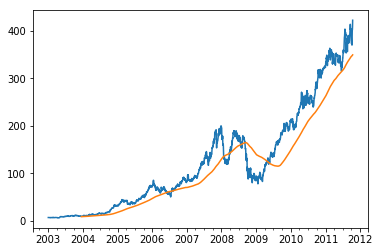

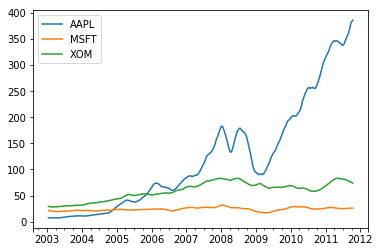

In [11]:
close_px_all = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()
# 如果当前数据小于滑动窗口大小，可以设置指定数量的非NA的观测值，默认这个值为1
close_px.AAPL.rolling(250).mean().plot();
close_px.rolling(60, min_periods=10).mean().plot();

### 时间序列预处理

**时间序列预处理**：   
包括平稳性检验和随机性检验。如果序列不满足这两个条件，则无法直接对序列进行预测。  

In [12]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
# data.index = data.index.strftime('%Y-%m')
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

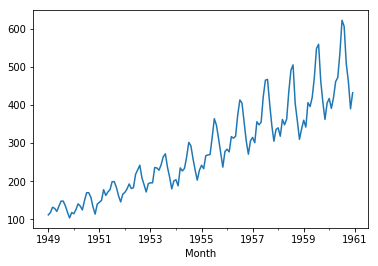

In [13]:
ts.plot();

#### 平稳性检验

**平稳性**：   
随着时间的推移，时间序列的基本特性维持不变，可分为强平稳和弱平稳。   

**严平稳**：   
序列的联合分布函数与时间的位移无关。在实际中，要想获得随机序列的联合分布式一件非常困难的事，所以严平稳时间序列通过只有理论意义，在实践中更多的是条件比较宽松的平稳时间序列。

**弱平稳**：    
序列的均值、标准差、协方差不随时间的变化而发生改变。   

严平稳不一定是弱平稳，弱平稳也不一定是严平稳。只有存在二阶矩的严平稳才能保证是弱平稳。

**ADF单位根检验**：    
H0：单位根存在，即序列不平稳    
H1：单位根不存在，即序列平稳   

**自相关检验**：  
平稳时间序列具有**短期**相关性，故平稳时间序列通常只有近期的项才对当前值的影响较为明显。随着间隔k的增大，平稳序列的自相关系数会不断衰减至0，而非平稳序列的衰减较慢。

In [14]:
# ADF检验给出以下结果——检验统计量、p值和临界值在1%、5%和10%置信区间。
# 如果检验统计量小于临界值，我们可以拒绝零假设（即序列是平稳的）。当检验统计量大于临界值时，我们无法拒绝零假设（不能说序列是平稳的）。
from statsmodels.tsa.stattools import adfuller

def stationarity_test(timeseries, window):
    
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    plt.figure(figsize=(10, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

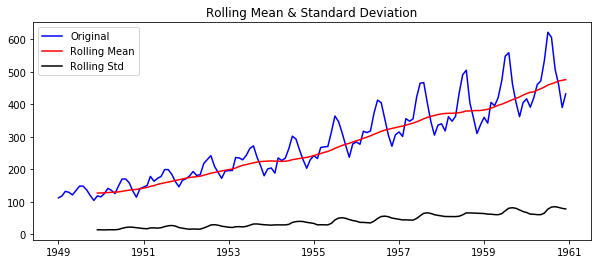

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [15]:
# P值不小于0.05，说明序列不稳定
stationarity_test(ts, 12)

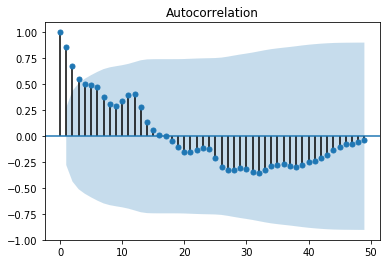

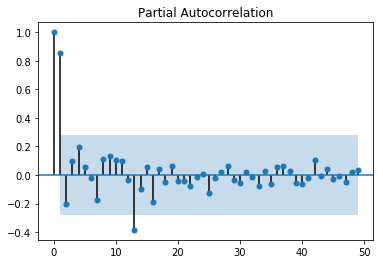

In [16]:
'''
自相关系数没有衰减至0的趋势，而且在很长的延迟期里，自相关系数一直为正，而后一直为负，显示出明显的三角对称性，
说明序列是非平稳序列，具有明显的单调性。
'''
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts[:50]);
plot_pacf(ts[:50]);

#### 随机性检验

**纯随机序列**:    
平稳序列值之间**没有任何相关性**的序列。从统计分析的角度而言，纯随机序列没有任何分析价值，纯随机序列也称为白噪声序列。纯随机指序列各项直接没有任何相关关系，序列中每个变量的**方差都相等**。

**纯随机性检验**:   
1. 检验序列样本自相关系数是否为0，并且在零附近随机扰动。一般构造Q统计量和LB统计量来进行检验。

2. Barlett证明，如果一个时间序列是随机的，得到一个观察期数为n的观测序列$\left\{ x _ { t } , t = 1,2 , \cdots , n \right\}$，那么该序列的延迟非零期的样本自相关系数将服从均值为0，方差为序列观察期倒数的正态分布。

3. 假设条件：   
H0：延迟期数小于等于m期的序列值之间相互独立    
H1：延迟期数小于等于m期的序列值之间有相关性    

4. 统计量：    
*Q统计量*：      
$Q = n \sum _ { k = 1 } ^ { m } \hat { \rho } _ { k } ^ { 2 }$, n为序列长度，m为延迟期数。Q统计量近似服从自由度为m的卡方分布，P值小于0.05是拒绝H0。Q统计量不适合小样本检验。   
*LB统计量*：    
$L B = n ( n + 2 ) \sum _ { k = 1 } ^ { m } \left( \frac { \dot { \rho } _ { k } ^ { 2 } } { n - k } \right)$， n为序列长度，m为延迟期数。LB统计量近似服从自由度为m的卡方分布，P值小于0.05是拒绝H0。LB统计量是对Q统计量的修正。

In [17]:
from statsmodels.sandbox.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
'''
Returns:
lbvalue (float or array) – test statistic
pvalue (float or array) – p-value based on chi-square distribution
bpvalue ((optionsal), float or array) – test statistic for Box-Pierce test
bppvalue ((optional), float or array) – p-value based for Box-Pierce test on chi-square distribution
'''
def random_test(timeseries):
    qljungbox, pval, qboxpierce, pvalbp = acorr_ljungbox(timeseries, boxpierce=True)
#     print(qljungbox, pval, qboxpierce, pvalbp)
    plt.ylabel('pValue')
    plt.plot(pval)
    plt.plot(pvalbp);

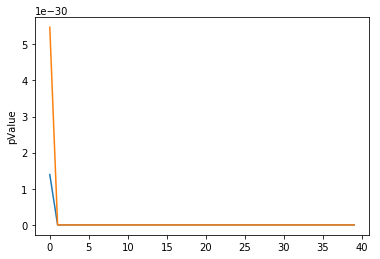

In [18]:
# P值大于等于0.05，说明延迟期数小于等于m期的序列值之间有相关性
random_test(ts)

#### 对非平稳时间序列的处理

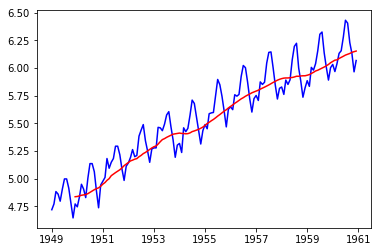

In [19]:
# 取对数，滑动平均和差分
ts_log = np.log(ts)
moving_avg = ts_log.rolling(window = 12).mean()
plt.plot(ts_log ,color = 'blue');
plt.plot(moving_avg, color='red');

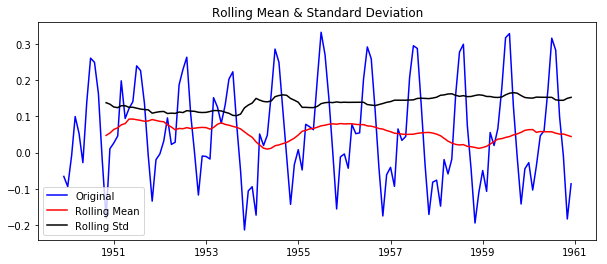

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


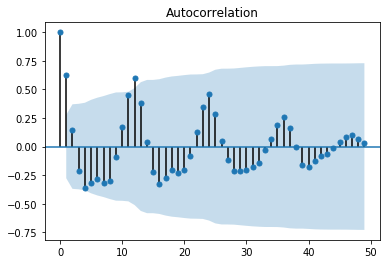

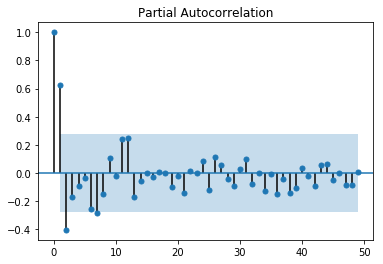

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace = True)

# 
stationarity_test(ts_log_moving_avg_diff, 12)
plot_acf(ts_log_moving_avg_diff[:50]);
plot_pacf(ts_log_moving_avg_diff[:50]);

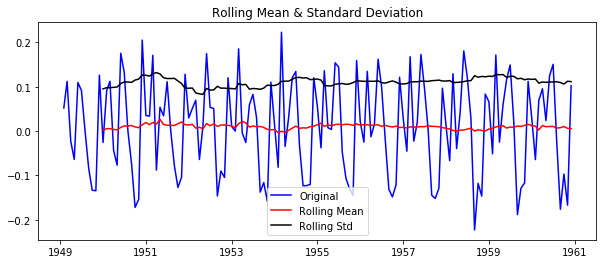

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


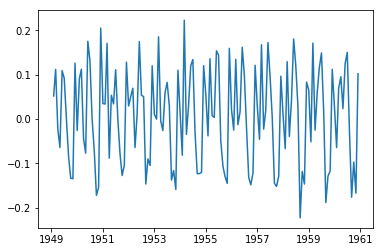

In [21]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
stationarity_test(ts_log_diff, 12)
plt.plot(ts_log_diff);

### 时间序列分析

**时间序列组成模式**:   
* 趋势Tend：比如线性趋势，先增加后降低的整体趋势。  
* 季节性Seasonal：以时间为固定周期，呈现循环的特性。   
* 周期性Cyclic：在以不固定周期不断震荡，通常周期性至少持续2年。   
* 随机波动。

**检测和去除趋势的方法**：   
* 聚合：将时间轴缩短，以一段时间内星期/月/年的均值作为数据值。使不同时间段内的值差距缩小。   
* 平滑：以一个滑动窗口内的均值代替原来的值，为了使值之间的差距缩小。   
* 多项式过滤：用一个回归模型来拟合现有数据，使得数据更平滑。 

#### AR模型

**AR模型**：   
具有如下结构的模型称为p阶**自回归模型**，简记为AR(p)：
$$x _ { t } = \mu + \sum _ { i = 1 } ^ { p } \phi _ { i } x _ { t - i } + \varepsilon _ { t } = \phi _ { 0 } + \phi _ { 1 } x _ { t - 1 } + \phi _ { 2 } x _ { t - 2 } + \cdots + \phi _ { p } x _ { t - p } + \varepsilon _ { t }$$   
即在t时刻的随机变量$X _ { t }$的取值$x _ { t }$是前p期$x _ { t - 1 } , x _ { t - 2 } , \cdots , x _ { t - p }$的多元线性回归，认为$x _ { t }$主要是受过去p期的序列值的影响。误差项是当期的随机干扰$\varepsilon _ { t }$，为零均值白噪声序列。 

**平稳AR模型的性质**：   

|  统计量        | 性质 || 统计量 |性质|   
|:---------------:|:---------:||:---------:|:---------:|
| 均值|常数均值       ||自相关系数(ACF) |拖尾，负指数衰减|
| 方差      | 常数方差      ||偏自相关系数(PACF)     |p阶截尾|     

**均值**：   
$$E \left( x _ { t } \right) = E \left( \phi _ { 0 } + \phi _ { 1 } x _ { t - 1 } + \phi _ { 2 } x _ { t - 2 } + \cdots + \phi _ { p } x _ { t - p } + \varepsilon _ { t } \right)$$   
已知$E \left( x _ { t } \right)=\mu, E \left( \varepsilon _ { t } \right) = 0$，所以有$\mu = \phi _ { 0 } + \phi _ { 1 } \mu + \phi _ { 2 } \mu + \cdots + \phi _ { p } \mu$，解得：
$$\mu = \frac { \phi _ { 0 } } { 1 - \phi _ { 1 } - \phi _ { 2 } - \cdots - \phi _ { p } }$$    

**方差**：   
平稳AR(p)模型的方差有界，等于常数。   

#### MA模型

**MA模型**：   
具有如下结构的模型称为q阶**移动平均模型**，简记为MA(q)：    
$$x _ { t } = \mu + \varepsilon _ { t } + \sum _ { i = 1 } ^ { q } \theta _ { i } \varepsilon _ { t - i } = \mu + \varepsilon _ { t } + \theta _ { 1 } \varepsilon _ { t - 1 } + \theta _ { 2 } \varepsilon _ { t - 2 } + \cdots + \theta _ { q } \varepsilon _ { t - q }$$
即在t时刻的随机变量$X _ { t }$的取值$x _ { t }$是前q期的随机扰动$\varepsilon _ { t - 1 } , \varepsilon _ { t - 2 } , \cdots , \varepsilon _ { t - q }$的多元线性函数，误差项是当期的随机干扰$\varepsilon _ { t }$，为零均值白噪声序列，$\mu$是序列$X _ { t }$的均值。认为$x _ { t }$主要是受过去q期的误差项的影响。   

**平稳MA(q)模型的性质**：  

|  统计量        | 性质 || 统计量 | 性质 |   
|:---------------:|:---------:||:---------:|:---------:|
| 均值|常数均值       ||自相关系数(ACF) |q阶截尾|
| 方差      | 常数方差      ||偏自相关系数(PACF)     |拖尾|   

#### ARMA模型

**ARMA模型**：   
具有如下结构的模型称为自回归移动平均模型，简记为ARMA(p,q)：   
$$x _ { t } = \mu + \sum _ { i = 1 } ^ { p } \phi _ { i } x _ { t - i } + \varepsilon _ { t } + \sum _ { i } ^ { q } \theta _ { i } \varepsilon _ { t - i }$$   
即在t时刻的随机变量$X _ { k }$的取值$x _ { k }$是前p期$x _ { t - 1 } , x _ { t - 2 } , \cdots , x _ { t - p }$和前q期$\varepsilon _ { t - 1 } , \varepsilon _ { t - 2 } , \cdots , \varepsilon _ { t - q }$的多元线性函数，误差项是当期的随机干扰$\varepsilon _ { t }$，为零均值白噪声序列。认为$x _ { k }$主要是受过去p期的序列值和过去q期的误差项的共同影响。当q=0时，是AR(p)模型；当q=0时，是MA(q)模型。

**平稳ARMA(p,q)模型的性质**：   

|  统计量        | 性质 || 统计量 | 性质 |   
|:---------------:|:---------:||:---------:|:---------:|
| 均值|常数均值       ||自相关系数(ACF) |拖尾|
| 方差      | 常数方差      ||偏自相关系数(PACF)     |拖尾|  

#### ARIMA模型

**ARIMA模型**：    
表示为ARIMA(p,d,q)，也是基于平稳的时间序列的或者差分化后是稳定的，前面的几种模型都可以看作ARIMA的某种特殊形式。p为自回归阶数，q为移动平均阶数，d为时间成为平稳时所做的差分次数。

#### 评估方法

**自相关系数(ACF)**：   
平稳AR(p)模型的自相关系数$\rho _ { k } = \rho ( t , s ) = \frac { \operatorname { cov } \left( X _ { t } , X _ { s } \right) } { \sigma _ { t } \sigma _ { s } }$呈指数的速度锐减，始终有非零取值，不会在k大于某个常数之后就恒等于零，这个性质就是平稳AR(p)模型的自相关系数$\rho _ { k }$具有拖尾性。    

**偏自相关系数(PACF)**：     
对于一个平稳AR(p)模型，求出延迟k期自相关系数$\rho _ { k }$时，实际上的得到的并不是$X _ { k }$与$X _ { t - k }$之间单纯的相关关系，因为$X _ { t }$同时还会收到中间k−1个随机变量$X _ { t - 1 } , X _ { t - 2 } , \cdots , X _ { t - k }$的影响，所以自相关系数$\rho _ { k }$里实际上掺杂了其他变量对$X _ { k }$与$X _ { t - k }$的相关影响，为了单纯地测度$X _ { t - k }$对$X _ { k }$的影响，引进偏自相关系数的概念。可以证明平稳AR(p)模型的偏自相关系数具有p阶截尾性。

**p阶自回归模型AR(p)**：   
AR(p)模型的偏自相关函数PACF在p阶之后应为零，称其具有截尾性。      
AR(p)模型的自相关函数ACF不能在某一步之后为零（截尾），而是按指数衰减（或成正弦波形式)，称其具有拖尾性。   

**q阶移动平均模型MA(q)**：   
MA(q)模型的自相关函数ACF在q阶之后应为零，称其具有截尾性。   
MA(q)模型的偏自相关函数PACF不能在某一步之后为零（截尾），而是按指数衰减（或成正弦波形式)，称其具有拖尾性。

**拖尾和截尾的判断**：    
* 如果样本自相关系数（或偏自相关系数）在最初的d阶明显大于2倍标准差范围，而后几乎95%的样本自相关（偏自相关）系数都落在2倍标准差范围以内，而且由非零自相关（偏自相关）系数衰减为小值波动的过程非常突然，这时，通常视为自相关（偏自相关）系数截尾。   

* 如果有超过5%的样本相关系数落在2倍标准差范围以外，或者是由显著非零的相关函数衰减为小值波动的过程比较缓慢或者非常连续，这时，通常视为相关系数不截尾。

**ARMA(p,q)模型识别**:   
称为模型定阶，由AP(p)模型、MA(q)模型和ARMA(p,q)的自相关系数和偏自相关系数的性质，选择合适的模型。   
识别的原则:   

|  模型        | 自相关系数(ACF) | 偏自相关系数(PACF) |   
|:---------------:|:---------:|:---------:|
| AR(p)|拖尾       |p阶截尾 |
| MA(q)      | q阶截尾      |    拖尾      |
| ARMA(p,q)      | p阶拖尾      |    q阶拖尾      |

以这个表来确定p和q，p值确定看PACF，q值确定看ACF，截尾的意义简而言之，就是落到95%置信区间内。

#### 时间序列建模

**时间序列建模步骤**：  
* 随机性检验，只有非随机序列才有分析和预测的必要，对于随机序列，无法分析和预测
* 计算ACF和PACF
* 根据计算结果进行ARMA模型的识别，确定p和q值   
* 估计模型中未知参数的均值
* 对模型进行检验，如果模型未通过验证，则返回至ARMA模型识别
* 对模型进行进一步优化
* 根据优化好的模型进行预测

https://www.zhihu.com/question/31833683

**消除趋势和季节性方法： 差分和分解**

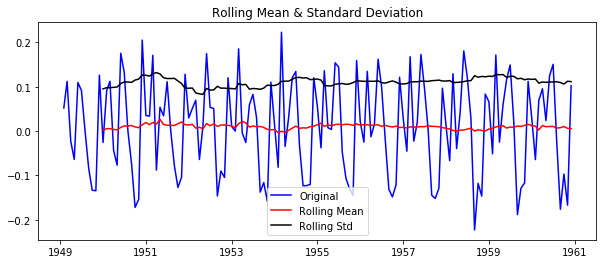

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [22]:
# 差分
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
stationarity_test(ts_log_diff, 12)

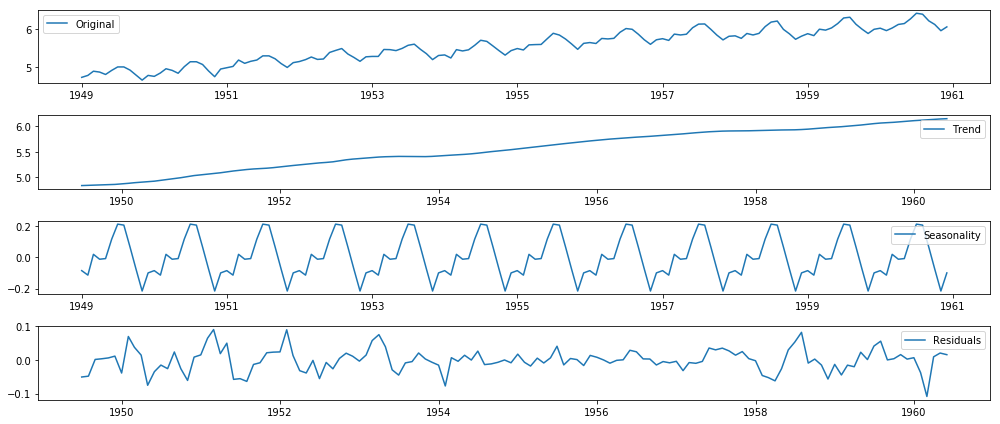

In [23]:
# 分解，分解后如何还原？

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 6))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

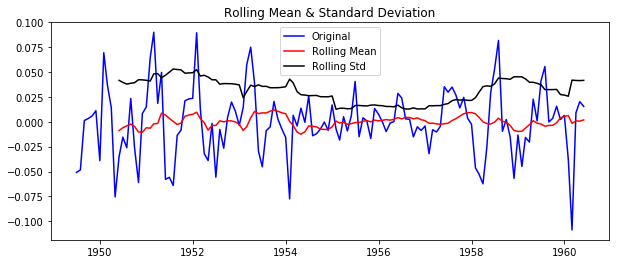

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [24]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
stationarity_test(ts_log_decompose, 12)

**ARIMA模型**

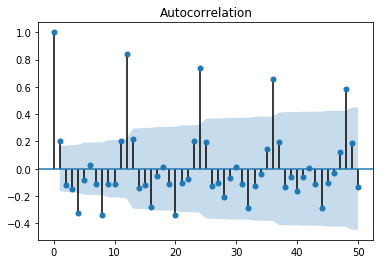

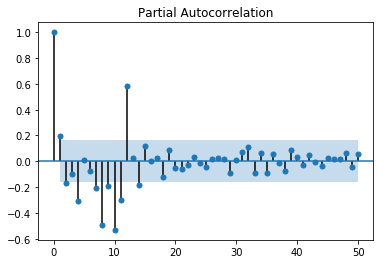

In [25]:
# lag_acf = acf(ts_log_diff, nlags=20)
# lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
# #Plot ACF: 
# plt.subplot(121) 
# plt.plot(lag_acf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.title('Autocorrelation Function')
# #Plot PACF:
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')
# plt.tight_layout()
plot_acf(ts_log_diff, lags=50);
plot_pacf(ts_log_diff, lags=50);

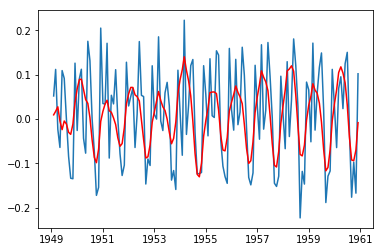

In [26]:
# 根据ACF和PACF图，选择p=2，q=2，即ARMA(2,2)

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red');

Text(0.5,1,'RMSE: 90.1043')

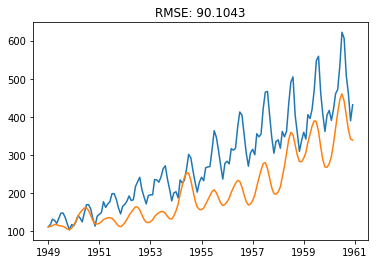

In [27]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [28]:
## TODO: 机器学习和深度学习预测时间序列。。。